In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [47]:
df = pd.read_csv('train.csv')
df.head(20)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0    1          60       RL         65.0     8450   Pave   NaN      Reg   
1    2          20       RL         80.0     9600   Pave   NaN      Reg   
2    3          60       RL         68.0    11250   Pave   NaN      IR1   
3    4          70       RL         60.0     9550   Pave   NaN      IR1   
4    5          60       RL         84.0    14260   Pave   NaN      IR1   
5    6          50       RL         85.0    14115   Pave   NaN      IR1   
6    7          20       RL         75.0    10084   Pave   NaN      Reg   
7    8          60       RL          NaN    10382   Pave   NaN      IR1   
8    9          50       RM         51.0     6120   Pave   NaN      Reg   
9   10         190       RL         50.0     7420   Pave   NaN      Reg   
10  11          20       RL         70.0    11200   Pave   NaN      Reg   
11  12          60       RL         85.0    11924   Pave   NaN      IR1   
12  13          20       RL          NaN    12968   Pave   NaN      IR2   
13  14          20       RL         91.0    10652   Pave   NaN      IR1   
14  15          20       RL          NaN    10920   Pave   NaN      IR1   
15  16          45       RM         51.0     6120   Pave   NaN      Reg   
16  17          20       RL          NaN    11241   Pave   NaN      IR1   
17  18          90       RL         72.0    10791   Pave   NaN      Reg   
18  19          20       RL         66.0    13695   Pave   NaN      Reg   
19  20          20       RL         70.0     7560   Pave   NaN      Reg   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
5          Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
6          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
7          Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
8          Lvl    AllPub    Inside       Gtl      OldTown     Artery   
9          Lvl    AllPub    Corner       Gtl      BrkSide     Artery   
10         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
11         Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
12         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
13         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
14         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
15         Lvl    AllPub    Corner       Gtl      BrkSide       Norm   
16         Lvl    AllPub   CulDSac       Gtl        NAmes       Norm   
17         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
18         Lvl    AllPub    Inside       Gtl      SawyerW       RRAe   
19         Lvl    AllPub    Inside       Gtl        NAmes       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0        Norm     1Fam     2Story            7            5       2003   
1        Norm     1Fam     1Story            6            8       1976   
2        Norm     1Fam     2Story            7            5       2001   
3        Norm     1Fam     2Story            7            5       1915   
4        Norm     1Fam     2Story            8            5       2000   
5        Norm     1Fam     1.5Fin            5            5       1993   
6        Norm     1Fam     1Story            8            5       2004   
7        Norm     1Fam     2Story            7            6       1973   
8        Norm     1Fam     1.5Fin            7            5       1931   
9      Artery   2fmCon     1.5Unf            5            6       1939   
10       Norm     1Fam     1Story            5            5       1965   
11       Norm     1Fam     

In [48]:
df['CentralAir'].value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

### The goal of your analysis is to identify the most important features of houses that affect the sale prices.

Let's find out correlations:

In [34]:
df.corr()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415   -0.238518     0.392075  0.260833     0.537808   
1stFlrSF       0.010496   -0.251758     0.457181  0.299475     0.476224   
2ndFlrSF       0.005590    0.307886     0.080177  0.050986     0.295493   
LowQualFinSF  -0.044230    0.046474     0.038469  0.004779    -0.030429   
GrLivArea      0.008273    0.074853     0.402797  0.263116     0.593007   
BsmtFullBath   0.002289    0.003491     0.100949  0.158155     0.111098   
BsmtHalfBath  -0.020155   -0.002333    -0.007234  0.048046    -0.040150   
FullBath       0.005587    0.131608     0.198769  0.126031     0.550600   
HalfBath       0.006784    0.177354     0.053532  0.014259     0.273458   
BedroomAbvGr   0.037719   -0.023438     0.263170  0.119690     0.101676   
KitchenAbvGr   0.002951    0.281721    -0.006069 -0.017784    -0.183882   
TotRmsAbvGrd   0.027239    0.040380     0.352096  0.190015     0.427452   
Fireplaces    -0.019772   -0.045569     0.266639  0.271364     0.396765   
GarageYrBlt    0.000072    0.085072     0.070250 -0.024947     0.547766   
GarageCars     0.016570   -0.040110     0.285691  0.154871     0.600671   
GarageArea     0.017634   -0.098672     0.344997  0.180403     0.562022   
WoodDeckSF    -0.029643   -0.012579     0.088521  0.171698     0.238923   
OpenPorchSF   -0.000477   -0.006100     0.151972  0.084774     0.308819   
EnclosedPorch  0.002889   -0.012037     0.010700 -0.018340    -0.113937   
3SsnPorch     -0.046635   -0.043825     0.070029  0.020423     0.030371   
ScreenPorch    0.001330   -0.026030     0.041383  0.043160     0.064886   
PoolArea       0.057044    0.008283     0.206167  0.077672     0.065166   
MiscVal       -0.006242   -0.007683     0.003368  0.038068    -0.031406   
MoSold         0.021172   -0.013585     0.011200  0.001205     0.070815   
YrSold         0.000712   -0.021407     0.007450 -0.014261    -0.027347   
SalePrice     -0.021917   -0.084284     0.351799  0.263843     0.790982   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.012609  -0.012713     -0.021998   -0.050298   -0.005024   
MSSubClass       -0.059316   0.027850      0.040581    0.022936   -0.069836   
LotFrontage      -0.059213   0.123349      0.088866    0.193458    0.233633   
LotArea          -0.005636   0.014228      0.013788    0.104160    0.214103   
OverallQual      -0.091932   0.572323      0.550684    0.411876    0.239666   
OverallCond       1.000000  -0.375983      0.073741   -0.128101   -0.046231   
YearBuilt        -0.375983   1.000000      0.592855    0.315707    0.249503   
YearRemodAdd      0.073741   0.592855      1.000000    0.179618    0.128451   
MasVnrArea       -0.128101   0.315707      0.179618    1.000000    0.264736   
BsmtFinSF1       -0.046231   0.249503      0.128451    0.264736    1.000000   
BsmtFinSF2        0.040229  -0.049107     -0.067759   -0.072319   -0.050117   
BsmtUnfSF        -0.136841   0.149040      0.181133    0.114442   -0.495251   
TotalBsmtSF      -0.171098   0.391452      0.291066    0.363936    0

In [28]:
# From correlation matrix, these are the variables that seem to be the most correlated
#GrLivArea 0.7
#OverallQual (Scale 10 to 1) 0.79
#GarageCars 0.64
#Garage Areas 0.62
#TotalBsmtSF 0.6
#1stFlrSF 605852

### Inspect variables not in correlation table

In [ ]:
# Look up categorical variables that wouldn't show up in corr matrix

# Neighborhood
# ExterCond
# Heating
# CentralAir (binary N/Y)
# GarageType
# SaleType

### Adjust: Inspect the distribution of sales price to ensure normal distribution

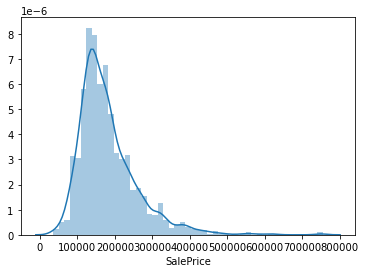

In [10]:
sns.distplot(df['SalePrice'])

since the distribution is skewed to the right, let's adjust it to make it more normal 

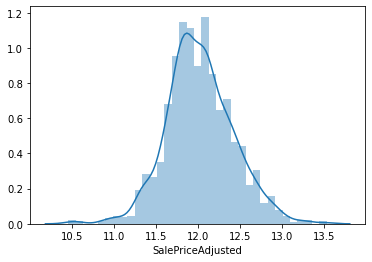

In [50]:
# since the distribution is skewed to the right, let's adjust it to make it more normal 

df['SalePriceAdjusted'] = np.log(df['SalePrice'])
sns.distplot(df['SalePriceAdjusted'])

# now we have a distribution that is more normal or bell-shaped to make visualization easier

In [16]:
# df['SalePriceAdjusted'] = np.log2(df['SalePrice'])
# sns.distplot(df['SalePriceAdjusted'])

### Remove columns with lots of missing values

In [20]:
# show percentage of NaN per column:

percent_missing = df.isnull().sum() * 100/len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns, 'percent_missing': percent_missing})

missing_value_df[missing_value_df['percent_missing']>10]

column_name  percent_missing
LotFrontage  LotFrontage        17.739726
Alley              Alley        93.767123
FireplaceQu  FireplaceQu        47.260274
PoolQC            PoolQC        99.520548
Fence              Fence        80.753425
MiscFeature  MiscFeature        96.301370

Drop the columns that have more than 10% missing values.

In [54]:
# df.drop(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

In [23]:
# Thomas did:
# df.drop(list(missing_value_df[missing_value_df['percent_missing']>10], axis=1, inplace=True))

In [55]:
# check to see if the columns were dropped successfully:
df

Id  MSSubClass MSZoning  LotArea Street LotShape LandContour  \
0        1          60       RL     8450   Pave      Reg         Lvl   
1        2          20       RL     9600   Pave      Reg         Lvl   
2        3          60       RL    11250   Pave      IR1         Lvl   
3        4          70       RL     9550   Pave      IR1         Lvl   
4        5          60       RL    14260   Pave      IR1         Lvl   
5        6          50       RL    14115   Pave      IR1         Lvl   
6        7          20       RL    10084   Pave      Reg         Lvl   
7        8          60       RL    10382   Pave      IR1         Lvl   
8        9          50       RM     6120   Pave      Reg         Lvl   
9       10         190       RL     7420   Pave      Reg         Lvl   
10      11          20       RL    11200   Pave      Reg         Lvl   
11      12          60       RL    11924   Pave      IR1         Lvl   
12      13          20       RL    12968   Pave      IR2         Lvl   
13      14          20       RL    10652   Pave      IR1         Lvl   
14      15          20       RL    10920   Pave      IR1         Lvl   
15      16          45       RM     6120   Pave      Reg         Lvl   
16      17          20       RL    11241   Pave      IR1         Lvl   
17      18          90       RL    10791   Pave      Reg         Lvl   
18      19          20       RL    13695   Pave      Reg         Lvl   
19      20          20       RL     7560   Pave      Reg         Lvl   
20      21          60       RL    14215   Pave      IR1         Lvl   
21      22          45       RM     7449   Pave      Reg         Bnk   
22      23          20       RL     9742   Pave      Reg         Lvl   
23      24         120       RM     4224   Pave      Reg         Lvl   
24      25          20       RL     8246   Pave      IR1         Lvl   
25      26          20       RL    14230   Pave      Reg         Lvl   
26      27          20       RL     7200   Pave      Reg         Lvl   
27      28          20       RL    11478   Pave      Reg         Lvl   
28      29          20       RL    16321   Pave      IR1         Lvl   
29      30          30       RM     6324   Pave      IR1         Lvl   
30      31          70  C (all)     8500   Pave      Reg         Lvl   
31      32          20       RL     8544   Pave      IR1         Lvl   
32      33          20       RL    11049   Pave      Reg         Lvl   
33      34          20       RL    10552   Pave      IR1         Lvl   
34      35         120       RL     7313   Pave      Reg         Lvl   
35      36          60       RL    13418   Pave      Reg         Lvl   
36      37          20       RL    10859   Pave      Reg         Lvl   
37      38          20       RL     8532   Pave      Reg         Lvl   
38      39          20       RL     7922   Pave      Reg         Lvl   
39      40          90       RL     6040   Pave      Reg         Lvl   
40      41          20       RL     8658   Pave      Reg         Lvl   
41      42          20       RL    16905   Pave      Reg         Lvl   
42      43          85       RL     9180   Pave      IR1         Lvl   
43      44          20       RL     9200   Pave      IR1         Lvl   
44      45          20       RL     7945   Pave      Reg         Lvl   
45      46         120       RL     7658   Pave      Reg         Lvl   
46      47          50       RL    12822   Pave      IR1         Lvl   
47      48          20       FV    11096   Pave      Reg         Lvl   
48      49         190       RM     4456   Pave      Reg         Lvl   
49      50          20       RL     7742   Pave      Reg         Lvl   
50      51          60       RL    13869   Pave      IR2         Lvl   
51      52          50       RM     6240   Pave      Reg         Lvl   
52      53          90       RM     8472   Grvl      IR2         Bnk   
53      54          20       RL    50271   Pave      IR1         Low   
54      55          80       RL     7134   Pave 

### Subset the dataframe to just columns that interest us:

In [51]:
# include both numeric and categorical variables:

interest = df[['GrLivArea', 'OverallQual', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'Neighborhood', 'ExterCond', 'Heating', 'CentralAir', 'GarageType', 'SaleType', 'SalePrice', 'SalePriceAdjusted']]

In [52]:
interest

GrLivArea  OverallQual  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
0          1710            7           2         548          856       856   
1          1262            6           2         460         1262      1262   
2          1786            7           2         608          920       920   
3          1717            7           3         642          756       961   
4          2198            8           3         836         1145      1145   
5          1362            5           2         480          796       796   
6          1694            8           2         636         1686      1694   
7          2090            7           2         484         1107      1107   
8          1774            7           2         468          952      1022   
9          1077            5           1         205          991      1077   
10         1040            5           1         384         1040      1040   
11         2324            9           3         736         1175      1182   
12          912            5           1         352          912       912   
13         1494            7           3         840         1494      1494   
14         1253            6           1         352         1253      1253   
15          854            7           2         576          832       854   
16         1004            6           2         480         1004      1004   
17         1296            4           2         516            0      1296   
18         1114            5           2         576         1114      1114   
19         1339            5           1         294         1029      1339   
20         2376            8           3         853         1158      1158   
21         1108            7           1         280          637      1108   
22         1795            8           2         534         1777      1795   
23         1060            5           2         572         1040      1060   
24         1060            5           1         270         1060      1060   
25         1600            8           3         890         1566      1600   
26          900            5           2         576          900       900   
27         1704            8           3         772         1704      1704   
28         1600            5           1         319         1484      1600   
29          520            4           1         240          520       520   
30         1317            4           1         250          649       649   
31         1228            5           1         271         1228      1228   
32         1234            8           2         484         1234      1234   
33         1700            5           2         447         1398      1700   
34         1561            9           2         556         1561      1561   
35         2452            8           3         691         1117      1132   
36         1097            5           2         672         1097      1097   
37         1297            5           2         498         1297      1297   
38         1057            5           1         246         1057      1057   
39         1152            4           0           0            0      1152   
40         1324            6           2         440         1088      1324   
41         1328            5           1         308         1350      1328   
42          884            5           2         504          840       884   
43          938            5           1         308          938       938   
44         1150            5           1         300         1150      1150   
45         1752            9           2         576         1752      1752   
46         2149            7           2         670         1434      1518   
47         1656            8           3         826         1656      1656   
48         1452            4           0           0          736       736   
49          955            5           1         386    

#### Binary

In [53]:
# CentralAir variable: binary Y/N
interest['CentralAir'] = np.where(interest['CentralAir']=='Y', 1, 0)
interest['CentralAir'].value_counts()


<ipython-input-53-8451b7179aa4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interest['CentralAir'] = np.where(interest['CentralAir']=='Y', 1, 0)


1    1365
0      95
Name: CentralAir, dtype: int64

In [44]:
# condition = interest['CentralAir']=='Y'
# interest['CentralAir']= np.where(condition, 1, 0)
# interest['CentralAir'].value_counts()

<ipython-input-44-3e81a6760de1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interest['CentralAir']= np.where(condition, 1, 0)


#### Categorical Variables

In [62]:
X = pd.get_dummies(interest['Neighborhood'], drop_first=True)
# first CollgCr 

In [60]:
# make loop to go through all categorical variables and get dummie var df for each to use in regression model

#### Regression Testing

Try some continuous linear variables

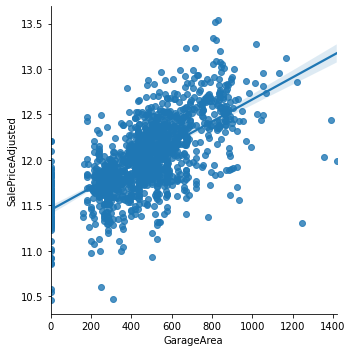

In [67]:
sns.lmplot(data=interest, x='GarageArea', y='SalePriceAdjusted')

# does this tell us ANYTHING?

In [64]:
X = interest[['GarageArea', 'TotalBsmtSF']]
Y = interest['SalePriceAdjusted']
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      SalePriceAdjusted   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     848.2
Date:                Thu, 12 Nov 2020   Prob (F-statistic):          5.13e-245
Time:                        21:24:22   Log-Likelihood:                -167.71
No. Observations:                1460   AIC:                             341.4
Df Residuals:                    1457   BIC:                             357.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          11.2427      0.020    551.135      0.000      11.203      11.283
GarageArea      0.0009   3.81e-05     22.690      0.000       0.001       0.001
TotalBsmtSF     0.0004   1.86e-05     18.987      0.000       0.000       0.000
==============================================================================
Omnibus:                      410.699   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3448.810
Skew:                          -1.066   Prob(JB):                         0.00
Kurtosis:                      10.221   Cond. No.                     3.56e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
# pd.concat, axis=1 
# first create the dummies individually and make one big dataframe with all the dummy variables 
# using the pd.concat, and then you can use this dataframe of dummies as your X variable in the model. 
